In [1]:
# import required library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_excel("Hospital Readmission Data.xlsx")
df.head()

,PatientID,Age (in years),Gender,AdmissionType,Diagnosis,LengthOfStay (in days),TreatmentReceived,FollowUpSchedule,Readmitted
0,1,65,Male,Emergency,Heart Failure,7,Medication A,Yes,Yes
1,2,50,Female,Elective,Hip Replacement,5,Surgery,Yes,No
2,3,72,Male,Emergency,Pneumonia,10,Antibiotics,No,Yes
3,4,45,Female,Urgent,Appendicitis,3,Surgery,Yes,No
4,5,80,Female,Emergency,Stroke,12,Rehabilitation,Yes,Yes


In [3]:
# Apply Label hot encoding on a data set
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['Gender', 'AdmissionType', 'Diagnosis', 'TreatmentReceived', 'FollowUpSchedule', 'Readmitted' ]
# Apply Label encoding to each categorical column
for columns in categorical_columns:
    df[columns] = le.fit_transform(df[columns])

In [4]:
df.head()

,PatientID,Age (in years),Gender,AdmissionType,Diagnosis,LengthOfStay (in days),TreatmentReceived,FollowUpSchedule,Readmitted
0,1,65,1,1,4,7,3,1,1
1,2,50,0,0,5,5,6,1,0
2,3,72,1,1,7,10,0,0,1
3,4,45,0,2,0,3,6,1,0
4,5,80,0,1,8,12,5,1,1


In [5]:
# data splitting
X = df.drop('Readmitted',axis=1)
y = df['Readmitted']

In [6]:
X

,PatientID,Age (in years),Gender,AdmissionType,Diagnosis,LengthOfStay (in days),TreatmentReceived,FollowUpSchedule
0,1,65,1,1,4,7,3,1
1,2,50,0,0,5,5,6,1
2,3,72,1,1,7,10,0,0
3,4,45,0,2,0,3,6,1
4,5,80,0,1,8,12,5,1
5,6,60,1,0,6,6,6,0
6,7,55,1,2,2,4,2,1
7,8,67,0,1,1,8,4,1
8,9,30,2,0,9,2,6,0
9,10,77,0,1,3,9,1,1


In [7]:
y

0    1
1    0
2    1
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: Readmitted, dtype: int32

In [8]:
# apply train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
# Check Dimensionality of a samples
X_train.shape

(8, 8)

In [10]:
X_test.shape

(2, 8)

In [11]:
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 0])

In [13]:
cm = confusion_matrix(y_test,y_pred)

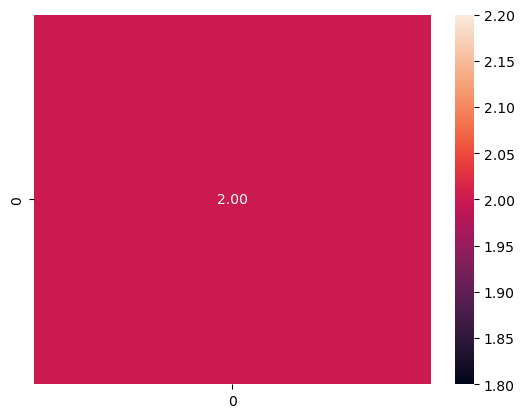

In [17]:
sns.heatmap(cm,annot = True,fmt=".2f")
plt.show()